Alexa Review- Sentiment Analysis

In [2]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS= set(stopwords.words('english'))
#scikit learn modules 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle 
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Devisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#load data

data = pd.read_csv(r"C:\Users\Devisha\Downloads\amazon_alexa.tsv", sep='\t')
print(f"Dataset shape: {data.shape}")


Dataset shape: (3150, 5)


In [6]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
#column names
print(f"Feature names: {data.columns.values}")
#check for null values
data.isnull().sum()

Feature names: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [8]:
#checking null values
data[data['verified_reviews'].isna() == True]


,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [9]:
#drop the null record
data.dropna(inplace=True)

In [10]:
print(f"Dataset shape after dropping null values: {data.shape}")

Dataset shape after dropping null values: (3149, 5)


In [11]:
#create new column length which will contain length of verified review
data['length'] = data['verified_reviews'].apply(len)

In [12]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [13]:
# randomly checking for 10th record
print(f"verified_reviews' column value: {data.iloc[10]['verified_reviews']}")
print(f"length of review: {len(data.iloc[10]['verified_reviews'])}")
print(f"length of column value: {data.iloc[10]['length']}")


verified_reviews' column value: I sent it to my 85 year old Dad, and he talks to it constantly.
length of review: 63
length of column value: 63


In [14]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [15]:
len(data)

3149

In [16]:
#distinct values of ratings and its count
print(f"rating value count: \n{data['rating'].value_counts()}")

rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


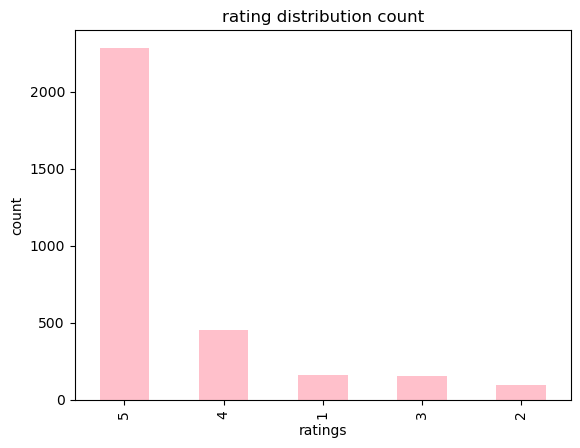

In [17]:
#plotting graph for each rating
data['rating'].value_counts().plot.bar(color= 'pink')
plt.title('rating distribution count')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

In [18]:
#percentage of distribution of each rating
print(f"rating value count- percentage distributin: \n{round(data['rating'].value_counts()/data.shape[0]*100, 2)}")

rating value count- percentage distributin: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


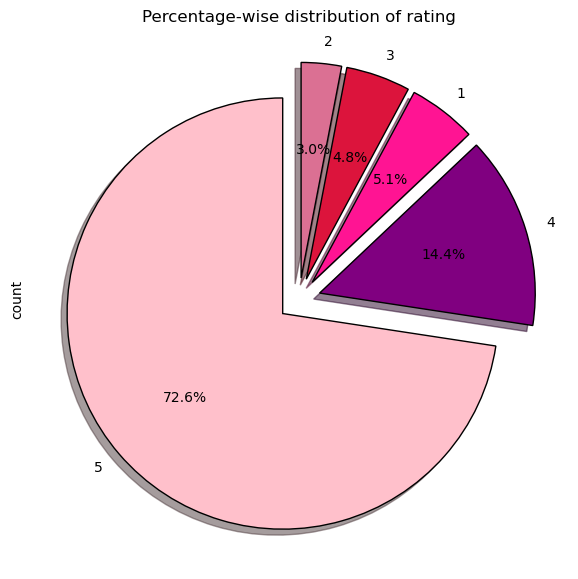

In [19]:
import matplotlib.pyplot as plt

# create a pie chart
fig = plt.figure(figsize=(7, 7))
colors = ('pink', 'purple', 'deeppink', 'crimson', 'palevioletred')
wp = {'linewidth': 1, 'edgecolor': 'black'}
tags = data['rating'].value_counts() / data.shape[0]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# plot the pie chart
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode)

# set title for the pie chart
plt.title('Percentage-wise distribution of rating')

# save figure to a buffer
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")


Analyzing feedback column

In [20]:
#counts of feedback
print(f"feedback value count: \n{data['feedback'].value_counts()}")

feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [21]:
#extract verified reviews value for one record with feedback=0
review_0= data[data['feedback']==0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [22]:
#extract verified reviews value for one record with feedback=1
review_0= data[data['feedback']==1].iloc[1]['verified_reviews']
print(review_0)

Loved it!


In [23]:
#0 for negative review
#1 for positive review

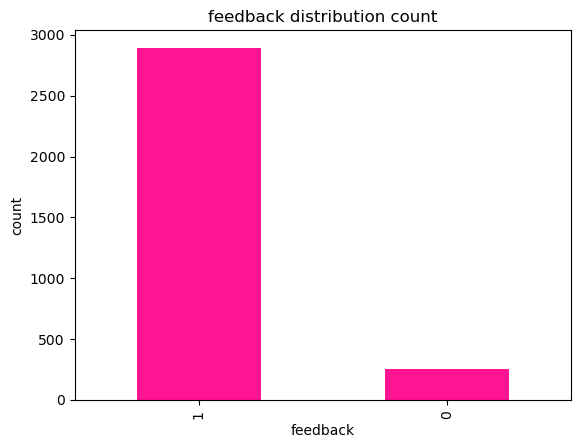

In [24]:
#bar graph to visualize the total counts of each feedback
data['feedback'].value_counts().plot.bar(color='deeppink')
plt.title('feedback distribution count')
plt.xlabel ('feedback')
plt.ylabel('count')
plt.show()

In [25]:
#percentage distribution of feedback column
print(f"feedback value count-percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

feedback value count-percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='count'>

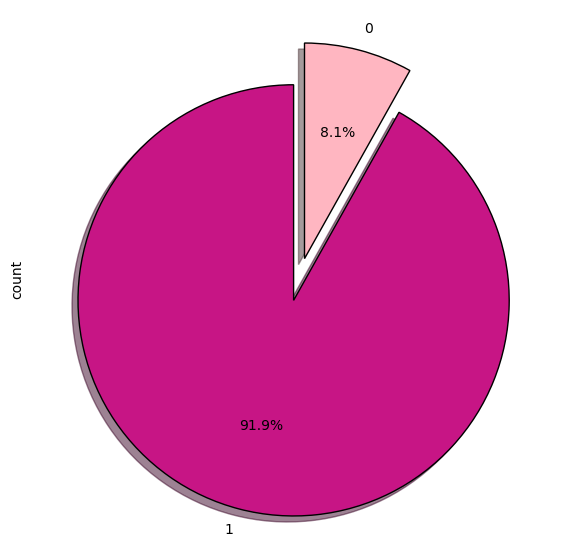

In [26]:
fig= plt.figure(figsize=(7,7))
colors=('mediumvioletred', 'lightpink')
wp={'linewidth':1, "edgecolor":'black'}
tags= data['feedback'].value_counts()/data.shape[0]
explode=(0.1, 0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode)


In [27]:
#feedback =0
data[data['feedback'] ==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [28]:
#feedback =1
data[data['feedback'] ==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

Analyzing variation column

In [29]:
#distinct value of variation and its count
print(f"variation value count: \n{data['variation'].value_counts()}")

variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


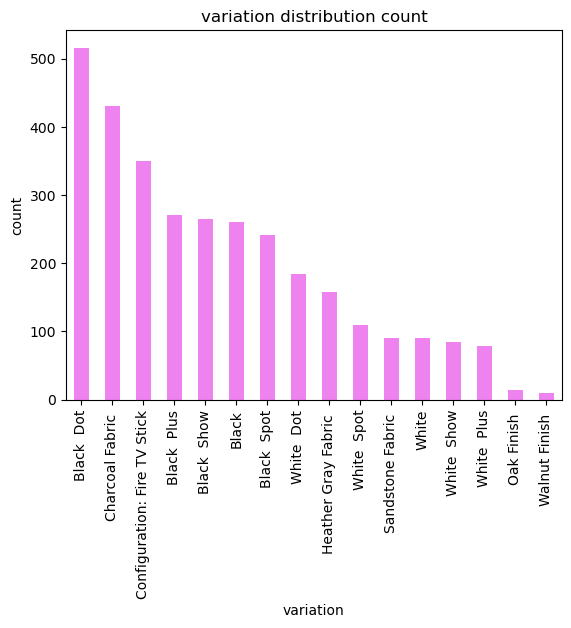

In [30]:
#bar graph to visualize total counts of each variation
data['variation'].value_counts().plot.bar(color='violet')
plt.title('variation distribution count')
plt.xlabel ('variation')
plt.ylabel('count')
plt.show()

In [31]:
#percentage distribution of each variation
print(f"count-percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

count-percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


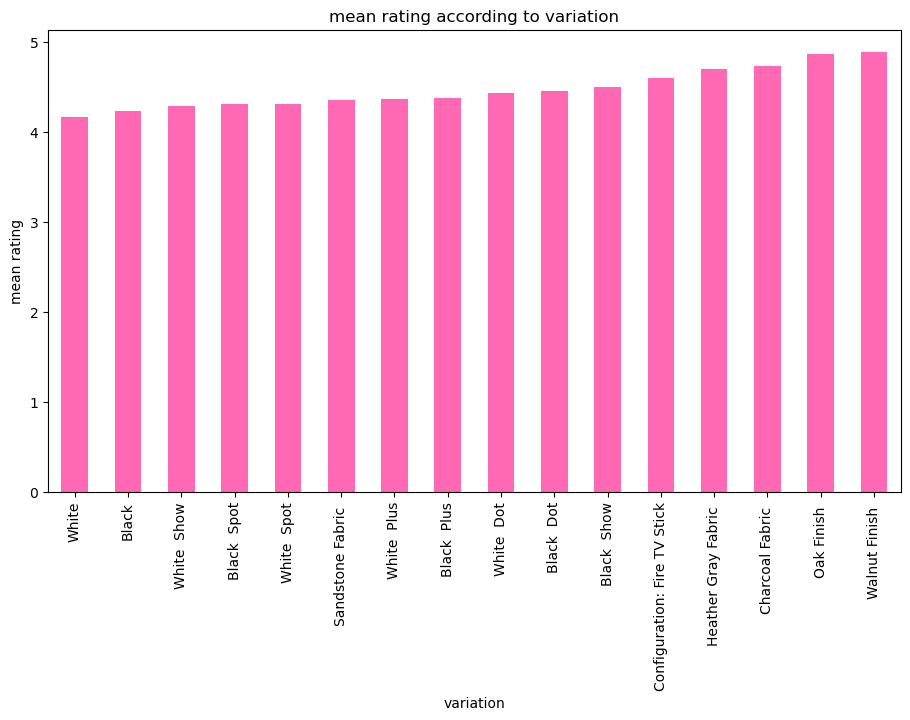

In [32]:
#bar graph to visualize total counts of each variation
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='hotpink', figsize=(11, 6))
plt.title('mean rating according to variation')
plt.xlabel ('variation')
plt.ylabel('mean rating')
plt.show()

Analyzing verified reviews column

In [33]:
data['length'].describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

C:\Users\Devisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of length of review ')]

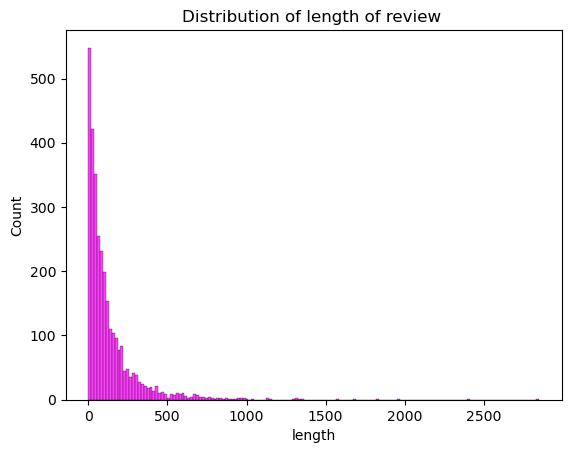

In [34]:
sns.histplot(data['length'],color='magenta').set(title='Distribution of length of review ')

C:\Users\Devisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

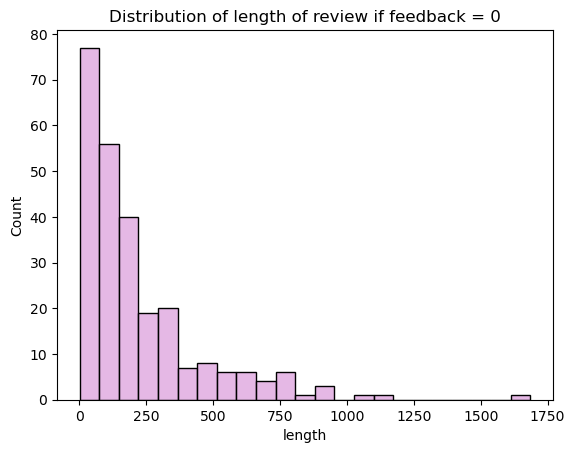

In [35]:
sns.histplot(data[data['feedback']==0]['length'],color='plum').set(title='Distribution of length of review if feedback = 0')

C:\Users\Devisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

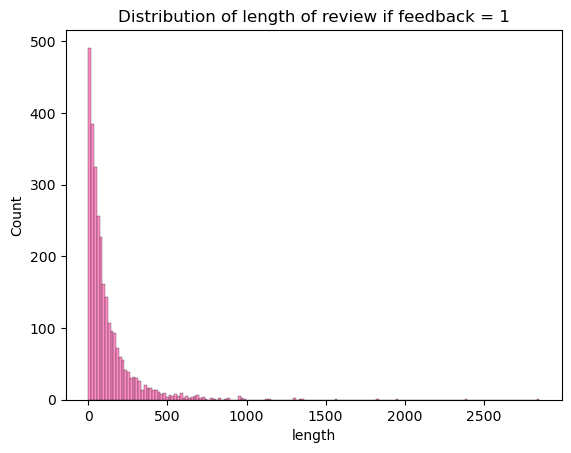

In [36]:
sns.histplot(data[data['feedback']==1]['length'],color='hotpink').set(title='Distribution of length of review if feedback = 1')

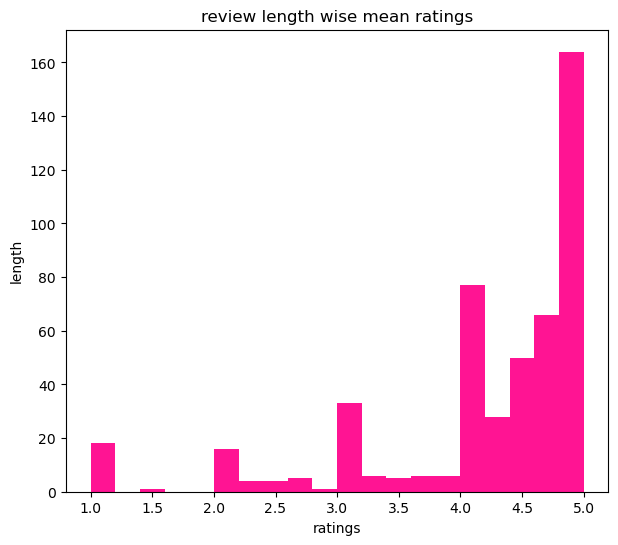

In [37]:
#bar graph to visualize total counts of each verified review
data.groupby('length')['rating'].mean().sort_values().plot.hist(color='deeppink', figsize=(7, 6), bins = 20)

plt.title('review length wise mean ratings')
plt.xlabel ('ratings')
plt.ylabel('length')
plt.show()

In [38]:
cv= CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)

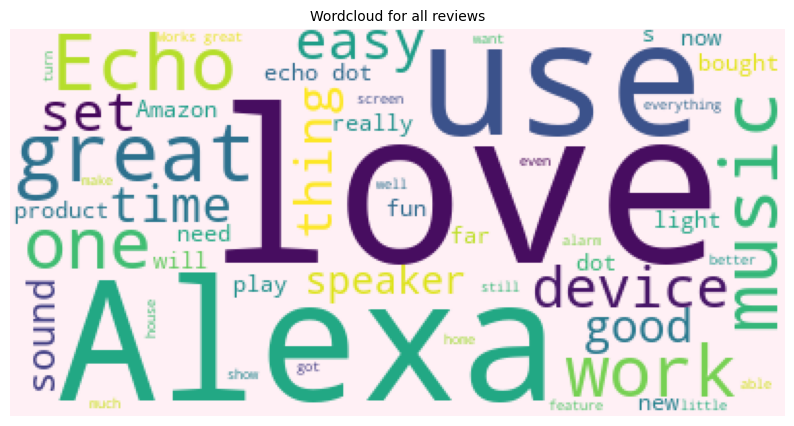

In [39]:
#combine all reviews
reviews=" ".join([review for review in data['verified_reviews']])
#initialize worldcloud object
wc=WordCloud(background_color='lavenderblush', max_words=50)

#generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [40]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

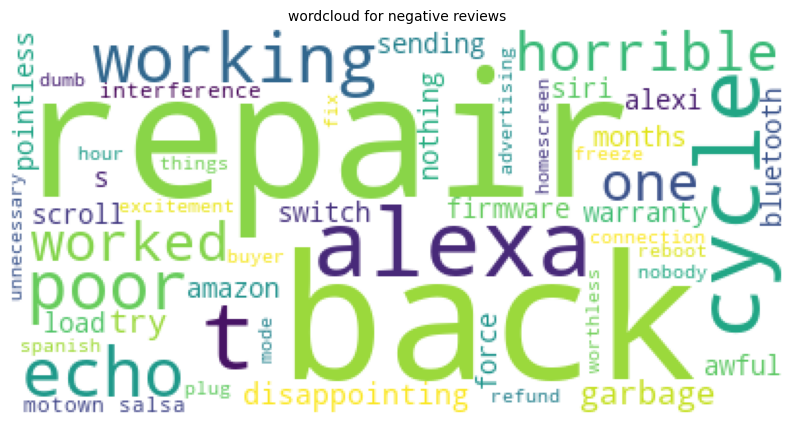

In [43]:
wc=WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

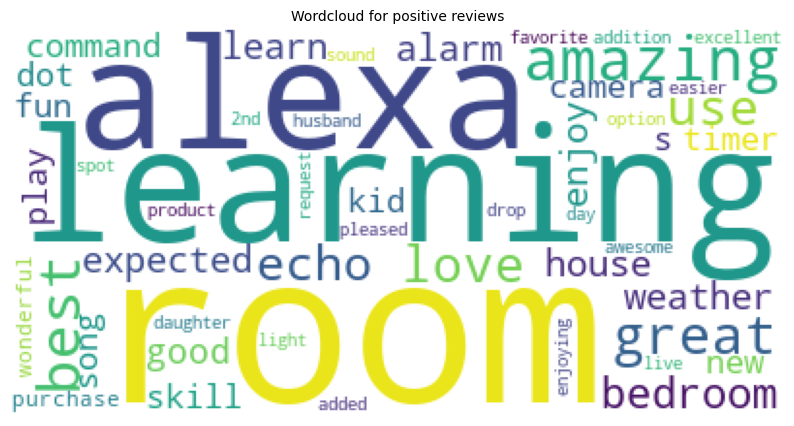

In [44]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

Preprocessing and Modelling

In [74]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [75]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [77]:
#Saving the Count Vectorizer
pickle.dump(cv, open(r"C:\Users\Devisha\Downloads\countVectorizer.pkl", 'wb'))

In [78]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


SPLITTING DATA INTO TRAIN AND TEST SET WITH 30% DATA WITH TESTING

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [80]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


In [81]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [82]:
#Saving the scaler model
pickle.dump(scaler, open(r"C:\Users\Devisha\Downloads\scaler.pkl", 'wb'))

In [83]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [84]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9439153439153439


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the data
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)  # Fit and transform on X_train
X_test_scl = scaler.transform(X_test)        # Transform X_test (without fitting again)

# Step 3: Train the model
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)  # Now fit the model

# Step 4: Make predictions
y_preds = model_rf.predict(X_test_scl)

# Step 5: Check accuracy on the test set
print("Testing Accuracy:", model_rf.score(X_test_scl, y_test))


Testing Accuracy: 0.926984126984127


In [86]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

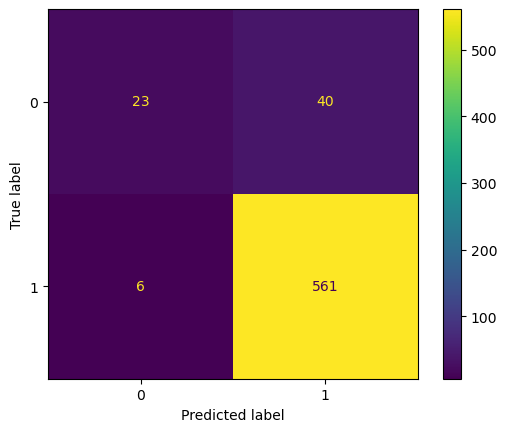

In [87]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

K-FOLD CROSS-VALIDATION

In [89]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
accuracies = cross_val_score(estimator=model_rf, X=X_train_scl, y=y_train, cv=10)

# Output the results
print("Accuracy: ", accuracies.mean())
print("Standard Deviation:", accuracies.std())


Accuracy:  0.9392667425535951
Standard Deviation: 0.007074910431785424


In [90]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [91]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [92]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [93]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 97.04242942874794
Cross validation mean accuracy on test set : 93.0776583204105
Accuracy score for test set : 0.926984126984127


XGBoost

In [95]:
from xgboost import XGBClassifier

# Create an XGBoost model
model_xgb = XGBClassifier()

# Fit the model
model_xgb.fit(X_train_scl, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9734021437078205
Testing Accuracy : 0.9174603174603174


In [97]:
y_preds = model_xgb.predict(X_test)

In [98]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[  0  63]
 [  0 567]]


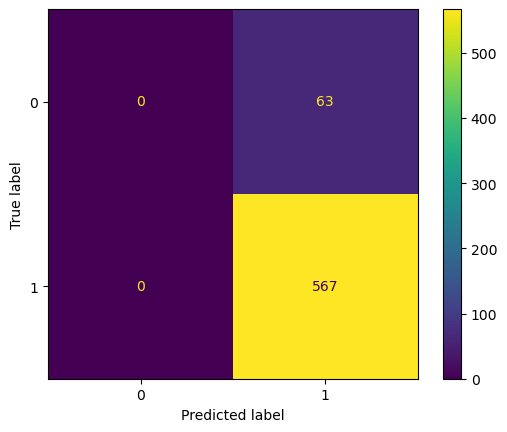

In [99]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [100]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open(r"C:\Users\Devisha\Downloads\model_xgb.pkl", 'wb'))

In [101]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [102]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9928543072647876
Testing Accuracy : 0.9063492063492063


In [103]:
y_preds = model_dt.predict(X_test)

In [104]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[  1  62]
 [  0 567]]


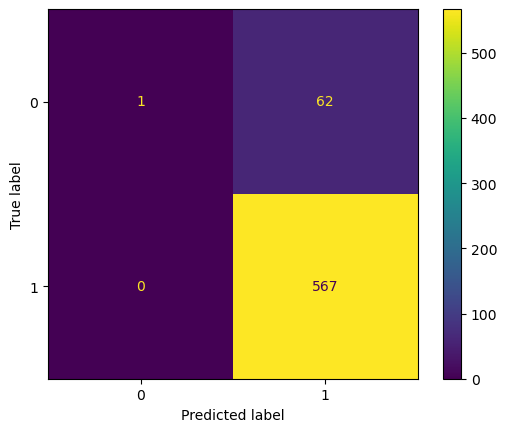

In [105]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()